# 크롤링 실습

In [7]:
# 필요한 라이브러리 다운로드
# 이미 설치되어 있으면 실행하지 않으셔도 됩니다

!pip3 install requests
!pip3 install bs4
!pip3 install selenium

### GET 요청하기

<Response [200]>


'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="제주도 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'제주도\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'제주도\'의 네이버 통합검색 결과입니다."> <title>제주도 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210805.css"> <link rel="stylesheet" type="text/css" href
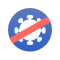
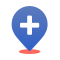
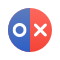
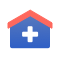

In [8]:
import requests

url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%A0%9C%EC%A3%BC%EB%8F%84&oquery=%EC%A0%9C%EC%A3%BC%EB%8F%84+%EC%97%AC%ED%96%89&tqi=htg9ydp0YiRsseJsM%2FNsssssshV-011537'
res = requests.get(url)

print(res) # 응답 객체
res.text # HTML 텍스트

#### HTTP 상태 코드
 - 1xx (정보): 요청을 받았으며 프로세스를 계속한다
 - 2xx (성공): 요청을 성공적으로 받았으며 인식했고 수용하였다
 - 3xx (리다이렉션): 요청 완료를 위해 추가 작업 조치가 필요하다
 - 4xx (클라이언트 오류): 요청의 문법이 잘못되었거나 요청을 처리할 수 없다
 - 5xx (서버 오류): 서버가 명백히 유효한 요청에 대해 충족을 실패했다

[출처: 위키피디아](https://ko.wikipedia.org/wiki/HTTP_%EC%83%81%ED%83%9C_%EC%BD%94%EB%93%9C)

In [9]:
res.status_code # HTTP 상태 코드

200

## BeautifulSoup

In [10]:
# 임시 html 텍스트
html = '''
<html>
  <head>
    <title>Example HTML</title>
  </head>
  <body>
    <div id='first' class='Example'>
      <h3 title='Good Content Title'>Contents Title</h3>
      <p>Test contents</p>
    </div>
    <div id='second' class='Example'>
      <p>Text1</p>
      <p>Text2</p>
      <p>Text3</p>
    </div>
  </body>
</html>
'''

In [11]:
from bs4 import BeautifulSoup

# 첫 번째 인자: 파싱할 객체
# 두 번째 인자: 사용할 parser(구문 분석기)
soup = BeautifulSoup(html, 'html.parser') 

### find(), find_all()
태그 검색   
- find(tag, attributes, recursive, text, keywords)   
- find_all(tag, attributes, recursive, text, limit, keywords)   

### get_text()
태그 내 텍스트 반환(부모 태그의 경우 자식 태그의 텍스트를 모두 반환)

In [12]:
tag = soup.find('h3')
print(tag)
tag.get_text()

<h3 title="Good Content Title">Contents Title</h3>


'Contents Title'

In [13]:
tag = soup.find('p')
print(tag)
tag.get_text()

<p>Test contents</p>


'Test contents'

In [14]:
# find_all은 list 형태로 값 반환
soup.find_all('p')

[<p>Test contents</p>, <p>Text1</p>, <p>Text2</p>, <p>Text3</p>]

In [15]:
soup.find_all('p')[2].get_text()

'Text2'

In [16]:
# 개수 제한
soup.find_all('p', limit=2)

[<p>Test contents</p>, <p>Text1</p>]

In [17]:
# 여러 태그
soup.find_all({'p', 'h3'})

[<h3 title="Good Content Title">Contents Title</h3>,
 <p>Test contents</p>,
 <p>Text1</p>,
 <p>Text2</p>,
 <p>Text3</p>]

In [18]:
# 해당 태그가 여러 개일 경우 첫번째 태그 반환
soup.find('div')

<div class="Example" id="first">
<h3 title="Good Content Title">Contents Title</h3>
<p>Test contents</p>
</div>

In [19]:
# 특정 속성을 가진 태그 검색
soup.find('div', {'id': 'second'})

<div class="Example" id="second">
<p>Text1</p>
<p>Text2</p>
<p>Text3</p>
</div>

In [20]:
# keyword 매개변수 이용
soup.find('div', id='second')

<div class="Example" id="second">
<p>Text1</p>
<p>Text2</p>
<p>Text3</p>
</div>

In [21]:
# 속성이 여러 개일 경우
attrs = {
    'id': 'second',
    'class': 'Example'
}
soup.find('div', attrs)

<div class="Example" id="second">
<p>Text1</p>
<p>Text2</p>
<p>Text3</p>
</div>

### 간단한 예제

네이버 검색 데이터 추출


[예제 URL](https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%A0%9C%EC%A3%BC%EB%8F%84)

<!DOCTYPE doctype html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="제주도 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'제주도'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'제주도'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>제주도 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210805.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net
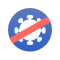
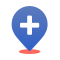
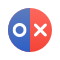
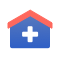

In [22]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%A0%9C%EC%A3%BC%EB%8F%84'
res = requests.get(url)

# 첫번째 인자를 텍스트로 넣어줘야 함
soup = BeautifulSoup(res.text, 'html.parser')
soup

In [23]:
title = soup.find('a')
title

<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>

In [24]:
title.get_text()

'메뉴 영역으로 바로가기'

In [25]:
# keyword로 class를 사용할 때는 _를 붙여주어야 함
# 파이썬의 클래스와 중복되기 떼문
title = soup.find_all('a', class_="api_txt_lines total_tit")
title

[<a class="api_txt_lines total_tit" data-recommend="1" href="https://blog.naver.com/hp0210/222466059313" onclick="return goOtherCR(this, 'a=rvw*x.link&amp;r=1&amp;i=90000003_0000000000000033CC02AC31&amp;u='+urlencode(this.href))" target="_blank">제주 렌트카 <mark>제주도</mark> 전기차 부담없이</a>,
 <a class="api_txt_lines total_tit" data-recommend="1" href="https://blog.naver.com/uni7741/222445065288" onclick="return goOtherCR(this, 'a=rvw*w.link&amp;r=2&amp;i=90000003_0000000000000033CAC25448&amp;u='+urlencode(this.href))" target="_blank"><mark>제주도</mark> 관광택시 너무 편했던 제주 카니발렌트</a>,
 <a class="api_txt_lines total_tit" data-recommend="1" href="https://blog.naver.com/gx339s/222457748310" onclick="return goOtherCR(this, 'a=rvw*b.link&amp;r=3&amp;i=90000003_0000000000000033CB83DB56&amp;u='+urlencode(this.href))" target="_blank"><mark>제주도</mark> 수영장 호텔, 썬라이즈 제주 중문점</a>,
 <a class="api_txt_lines total_tit" data-recommend="1" href="https://blog.naver.com/findjeju/222422079498" onclick="return goOtherCR(this,

In [26]:
# 배열에 저장
all_title = [item.get_text() for item in title]
all_title

['제주 렌트카 제주도 전기차 부담없이',
 '제주도 관광택시 너무 편했던 제주 카니발렌트',
 '제주도 수영장 호텔, 썬라이즈 제주 중문점',
 '혜택이 쏠쏠한 제주도 펜션',
 '6월에 갔던 제주도 신혼여행',
 '제주도 택시투어 제주 관광코스 여유롭게 힐링여행',
 '그랜드 하얏트 제주 호텔 룸과 수영장 제주도 호캉스',
 '더블 데이트 하기 좋은 제주도 커플여행!',
 '여름휴가 필수 관광지 제주도 만장굴']

## Selenium

In [27]:
!pip install selenium

In [28]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# path 변수에 자신의 chromedriver가 있는 파일 위치를 할당
# window : ~/chromedriver.exe
# mac : ~/chromedriver (.exe 빼기) 
path = 'C:/Users/isyou/Downloads/chromedriver_win32/chromedriver.exe'

driver = webdriver.Chrome(path)

In [29]:
'''
# webdriver에 옵션 적용 가능
options = webdriver.ChromeOptions()

# 브라우저 창이 안뜨고 실행
options.add_argument('headless')
# 브라우저 사이즈 설정
options.add_argument('window-size=1920x1080')

# 옵션 적용
driver = webdriver.Chrome(path, options=options)
'''

"\n# webdriver에 옵션 적용 가능\noptions = webdriver.ChromeOptions()\n\n# 브라우저 창이 안뜨고 실행\noptions.add_argument('headless')\n# 브라우저 사이즈 설정\noptions.add_argument('window-size=1920x1080')\n\n# 옵션 적용\ndriver = webdriver.Chrome(path, options=options)\n"

In [30]:
driver.get('https://www.naver.com/')

# id 속성으로 검색창 찾기
search = driver.find_element_by_id('query')

# 검색어 입력
search.send_keys('제주도')
# Keys.RETURN = Enter 입력
search.send_keys(Keys.RETURN)


# a 태그의 텍스트로 찾기
search = driver.find_element_by_link_text('이미지')
# 클릭
search.click()

\* 셀레니움 사용 시 브라우저에서 해당 웹 페이지의 요소들을 로드하는 데 시간이 좀 걸리기 때문에, element가 존재하지 않는다는 error가 발생할 수 있다.   
그럴 경우 해당 요소가 전부 준비가 될 때까지 대기해야 한다.

```python
driver.implicitly_wait(time_to_wait=5)
```
-> 찾으려는 element가 로드될 때까지 지정한 시간만큼 대기할 수 있도록 설정   
위 방법은 암시적 대기 방식으로, webdriver에 영구적으로 작용된다.   
time_to_wait=5: 5초까지 기다림

https://workingwithpython.com/selenium-waits/

In [31]:
driver.get('https://finance.naver.com/')

all_title=[]

for i in range(1,5):
    # css 선택자로 찾기
    # 크롬 개발자 도구에서 copy selector를 이용하면 편함
    css = '#content > div.article > div.section > div.news_area > div > ul > li:nth-child(' + str(i) + ') > span > a'
    content = driver.find_element_by_css_selector(css)
    all_title.append(content.text)

print(all_title)

['[오전시황] 오늘도 이어지는 외국인 코스피 매도...3,220선', ' [원자재시황]국제유가, 美 원유재고 감소 소식에 상승 마감', '[외환브리핑]예상치 부합한 美 물가 상승...환율, 나흘만에 하락 예상', '[일일펀드동향] 韓 주식형펀드 4거래일간 1065억원 순유입']


### CSS Selector
HTML 요소를 선택해주는 요소
- 태그 선택자
- 클래스 선택자(.)
- ID 선택자(#)
- 자식 선택자(>)
- 하위 선택자( )

In [32]:
# 현재 열려있는 페이지 url 찾기
url = driver.current_url
url

'https://finance.naver.com/'

In [33]:
# 브라우저 닫기
driver.close()

## 크롤링 예제

cine21 배우 랭킹 사이트 크롤링
  - 사이트 주소: http://www.cine21.com/rank/person/
  - 요청 방식 확인 방법: 크롬 개발자 모드로 들어가서, Network -> Fetch/XHR -> content 페이지의 요청 방식 확인
    - Request URL: http://www.cine21.com/rank/person/content
    - Request Method: POST
    - Form data
      - section = 'actor'
      - period_start = '2021-07'
      - gender = 'all'
      - page = 1 

In [34]:
import re
import requests
from bs4 import BeautifulSoup

In [35]:
cine21_url = 'http://www.cine21.com/rank/person/'
res = requests.get(cine21_url)
print(res.text) # get으로 할 경우 배우 리스트가 응답으로 반환되지 않음(사이트마다 다름)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
	<meta property="fb:pages" content="1641311652800771" />
<meta name="google-site-verification" content="vTM0gmeRzJwn1MIM1LMSp3cxP_SaBzch1ziRY255RHw" />	
	<meta name="google-site-verification" content="5yOe6b_e_3rr7vNDwgXJw_8wLZQGx4lJ_V48KNPrqkA" />
	<meta name="naver-site-verification" content="20defde86fc4464f2693891567a98905bd0a60d1" />
	<meta name='dailymotion-domain-verification' content='dmds9ks357rhqvdnk' />
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
	<meta http-equiv="X-UA-Compatible" content="IE=edge">
	<title>씨네21</title>
	<link rel="stylesheet" type="text/css" media="all" href="/inc/www/css/default1.css" />
	<link rel="stylesheet" type="text/css" media="all" href="/inc/www/css/content1.css" />
	<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.12.0/jquery.min.js"></scr

### 크롤링 주소 요청
dictionary를 이용하여 form data 생성   
request모듈의 post 함수를 이용하여 요청 전송

- 첫 번째 인자: 요청 url
- 두 번째 인자: form data

In [36]:
cine21_url = 'http://www.cine21.com/rank/person/content'
post_data = dict()
post_data['section'] = 'actor'
post_data['period_start'] = '2021-07'
post_data['gender'] = 'all'
post_data['page'] = 1

res = requests.post(cine21_url, data=post_data)

In [37]:
res.text

'\t\t\t<ul class="people_list">\r\n\t\t\t\t<li class="people_li">\r\n\t\t\t\t\t<a href="/db/person/info/?person_id=57423"><img src="https://image.cine21.com/resize/cine21/person/2019/0410/18_00_45__5cadb0bd79e87[X145,145].jpg" alt="" class="people_thumb" target="_blank" /></a>\r\n\t\t\t\t\t<div class="name"><a href="/db/person/info/?person_id=57423">김윤석(1편)</a></div>\r\n\t\t\t\t\t<ul class="num_info">\r\n\t\t\t\t\t\t<li><span class="tit">흥행지수</span><strong>138,669</strong></li>\r\n\t\t\t\t\t\t<!--\r\n\t\t\t\t\t\t<li><a href="#" class="btn_graph"><span class="ico"></span><span>흥행성적<br />그래프로 보기</span></a></li>\r\n\t\t\t\t\t\t-->\r\n\t\t\t\t\t</ul>\r\n\t\t\t\t\t<!-- 영화포스터는 최대 5개까지만 -->\r\n\t\t\t\t\t<ul class="mov_list">\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t<li>\r\n\t\t\t\t\t\t\t\t<a href="/movie/info/?movie_id=57275">\r\n\t\t\t\t\t\t\t\t\t<img src="https://image.cine21.com/resize/cine21/poster/2021/0728/15_15_08__6100f5eca274b[X85,120].jpg" alt="" class="thumb"  target="_blank" />\r\n\t\t\t\

In [38]:
soup = BeautifulSoup(res.text, 'html.parser')

### 배우 이름 추출

In [39]:
# select(): find_all()과 동일한 작동을 하는 함수
# 차이점은 파라미터로 css selector를 사용
# 좀 더 간편하다
soup.select('li.people_li div.name') # class가 people_li인 li 태그 중 class가 name인 div 태그 list

[<div class="name"><a href="/db/person/info/?person_id=57423">김윤석(1편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=16259">조인성(1편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=2425">허준호(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=82573">김소진(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=64972">정만식(1편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=98611">조우진(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=71787">구교환(2편)</a></div>]

In [40]:
actors = soup.select('li.people_li div.name')
for actor in actors:
    print(actor.text)

김윤석(1편)
조인성(1편)
허준호(2편)
김소진(2편)
정만식(1편)
조우진(2편)
구교환(2편)


이름만 추출할 수 없을까? -> 정규표현식 사용

In [41]:
test_data = '조우진(2편)'
# re.sub(정규 표현식, 치환 문자, 대상 문자열)
re.sub('\(\w*\)', '', test_data) # \w: 문자, 숫자와 매치

'조우진'

In [42]:
actors = soup.select('li.people_li div.name')
for actor in actors:
    print(re.sub('\(\w*\)', '', actor.text))

김윤석
조인성
허준호
김소진
정만식
조우진
구교환


### 배우 상세 정보 추출

In [43]:
actors = soup.select('li.people_li div.name')
# select_one(): find()와 대응되는 함수
for actor in actors:
    print (actor.select_one('a'))

<a href="/db/person/info/?person_id=57423">김윤석(1편)</a>
<a href="/db/person/info/?person_id=16259">조인성(1편)</a>
<a href="/db/person/info/?person_id=2425">허준호(2편)</a>
<a href="/db/person/info/?person_id=82573">김소진(2편)</a>
<a href="/db/person/info/?person_id=64972">정만식(1편)</a>
<a href="/db/person/info/?person_id=98611">조우진(2편)</a>
<a href="/db/person/info/?person_id=71787">구교환(2편)</a>


In [44]:
actors = soup.select('li.people_li div.name')
actors_info_list = list()

for actor in actors:
    actor_link = 'http://www.cine21.com' + actor.select_one('a')['href'] # 태그 내 속성 접근
    response_actor = requests.get(actor_link) # 배우 상세 페이지 이동
    soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
    default_info = soup_actor.select_one('ul.default_info')
    actor_details = default_info.select('li')
    print(actor_details)

[<li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1968-01-21</li>, <li><span class="tit">성별</span>남</li>, <li><span class="tit">신장/체중</span>178cm, 68kg</li>, <li><span class="tit">학교</span>동의대학교 학사</li>, <li><span class="tit">취미</span>여행, 낚시</li>, <li><span class="tit">소속사</span>심엔터테인먼트</li>]
[<li><span class="tit">다른 이름</span>趙寅成</li>, <li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1981-07-28</li>, <li><span class="tit">성별</span>남</li>, <li><span class="tit">신장/체중</span>186cm, 72kg</li>, <li><span class="tit">학교</span>전남과학대 모델이벤트과 - 동국대 연극영화 (중퇴)</li>, <li><span class="tit">취미</span>모자모으기, 영화보기, 농구</li>, <li><span class="tit">특기</span>농구, 태권도(공인 4단)</li>, <li><span class="tit">소속사</span>싸이더스 HQ</li>]
[<li><span class="tit">원어명</span>許俊豪</li>, <li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1964-03-03</li>, <li><span class="tit">성별</span>남</li>, <li><span class="tit">신장/체중</span>180cm, 75kg</li>, <li><span class

배우마다 가지고 있는 정보가 다르다!   
-> dictionary 형태로 저장

In [45]:
actors = soup.select('li.people_li div.name')
actors_info_list = list()

for actor in actors:
    actor_link = 'http://www.cine21.com' + actor.select_one('a')['href'] # 태그 내 속성 접근
    response_actor = requests.get(actor_link) # 배우 상세 페이지 이동
    soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
    default_info = soup_actor.select_one('ul.default_info')
    actor_details = default_info.select('li')
    
    actor_info_dict = dict()
    
    for actor_detail in actor_details:
        actor_detail_key = actor_detail.select_one('span.tit').text # 상세정보 key값
        actor_detail_value = re.sub('<span.*>.*</span>', '', str(actor_detail)) # span 태그 제거
        actor_detail_value = re.sub('<.*?>', '', actor_detail_value) # 상세정보 value값
        actor_info_dict[actor_detail_key] = actor_detail_value
        
    actors_info_list.append(actor_info_dict)

actors_info_list

[{'직업': '배우',
  '생년월일': '1968-01-21',
  '성별': '남',
  '신장/체중': '178cm, 68kg',
  '학교': '동의대학교 학사',
  '취미': '여행, 낚시',
  '소속사': '심엔터테인먼트'},
 {'다른 이름': '趙寅成',
  '직업': '배우',
  '생년월일': '1981-07-28',
  '성별': '남',
  '신장/체중': '186cm, 72kg',
  '학교': '전남과학대 모델이벤트과 - 동국대 연극영화 (중퇴)',
  '취미': '모자모으기, 영화보기, 농구',
  '특기': '농구, 태권도(공인 4단)',
  '소속사': '싸이더스 HQ'},
 {'원어명': '許俊豪',
  '직업': '배우',
  '생년월일': '1964-03-03',
  '성별': '남',
  '신장/체중': '180cm, 75kg',
  '학교': '서울예술대학 연극과',
  '취미': '만화책 보기',
  '특기': '야구, 농구',
  '소속사': '지티비엔터테인먼트'},
 {'직업': '배우', '성별': '여'},
 {'직업': '배우', '성별': '남'},
 {'다른 이름': '조신제', '직업': '배우', '생년월일': '1979-01-16', '성별': '남'},
 {'직업': '배우', '생년월일': '1982-12-14', '성별': '남'}]

### 특수한 정규 표현식
Greedy(.*) vs Non-Greedy(.*?)
- . 문자는 개행 문자를 제외한 모든 문자 한개를 의미
- \* 문자는 앞 문자가 0번 이상 반복되는 패턴
- ? 문자는 패턴에 여러 개가 포함될 경우 가장 적은 개수만 포함되도록 함

```html
<li><span class="tit">직업</span>배우</li>
  - <.*> -> <li><span class="tit">원어명</span>주지훈</li>
  - <.*?> -> <li>
```

### 최종 코드

In [ ]:
actors_info_list = list()
for i in range(1,11):
    cine21_url = 'http://www.cine21.com/rank/person/content'
    post_data = dict()
    post_data['section'] = 'actor'
    post_data['period_start'] = '2021-07'
    post_data['gender'] = 'all'
    post_data['page'] = i
    res = requests.post(cine21_url, data=post_data)
    soup = BeautifulSoup(res.text, 'html.parser')
    actors = soup.select('li.people_li')

    for index, actor in enumerate(actors):
        actor_info_dict = dict()
        actor_div = actor.select_one('div.name')
        actor_name = re.sub('\(\w*\)', '', actor_div.text)
        actor_score = actor.select_one('ul.num_info li strong')
        actor_movies = actor.select('ul.mov_list li a span')
        movielist = []
        for movie in actor_movies:
            movielist.append(movie.text)
        actor_rank = actor.select_one('span.grade')
        actor_info_dict['이름'] = actor_name
        actor_info_dict['흥행지수'] = re.sub(',', '', actor_score.text)
        actor_info_dict['출연영화'] = movielist
        actor_info_dict['랭킹'] = actor_rank.text
        actor_link = 'http://www.cine21.com' + actor_div.select_one('a')['href']
        response_actor = requests.get(actor_link)
        soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
        default_info = soup_actor.select_one('ul.default_info')
        actor_details = default_info.select('li')

        for actor_detail in actor_details:
            actor_detail_key = actor_detail.select_one('span.tit').text
            actor_detail_value = re.sub('<span.*>.*</span>', '', str(actor_detail))
            actor_detail_value = re.sub('<.*?>', '', actor_detail_value)
            actor_info_dict[actor_detail_key] = actor_detail_value

        actors_info_list.append(actor_info_dict)

actors_info_list